< 9. [Fouille de données](09-fouille-donnees.ipynb) | [Contents](index.ipynb) |

In [59]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import mplleaflet as mpll

In [60]:
accidents = gpd.read_file("donnees/accidents-geobase/accidents_2018.shp")
accidents = accidents[~accidents.geometry.isnull()]
accidents.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21381 entries, 0 to 21384
Data columns (total 70 columns):
NO_SEQ_COL    21381 non-null object
JR_SEMN_AC    21381 non-null object
DT_ACCDN      21381 non-null object
CD_MUNCP      21377 non-null float64
NO_CIVIQ_A    8868 non-null float64
SFX_NO_CIV    49 non-null object
BORNE_KM_A    7 non-null float64
RUE_ACCDN     20257 non-null object
TP_REPRR_A    13625 non-null float64
ACCDN_PRES    14465 non-null object
NB_METRE_D    4394 non-null float64
CD_GENRE_A    20662 non-null float64
CD_SIT_PRT    474 non-null float64
CD_ETAT_SU    20519 non-null float64
CD_ECLRM      20572 non-null float64
CD_ENVRN_A    20829 non-null float64
NO_ROUTE      77 non-null float64
CD_CATEG_R    20930 non-null float64
CD_ETAT_CH    5832 non-null float64
CD_ASPCT_R    20729 non-null float64
CD_LOCLN_A    20015 non-null float64
CD_POSI_AC    5397 non-null float64
CD_CONFG_R    19842 non-null float64
CD_ZON_TRA    481 non-null float64
CD_PNT_CDR    14 no

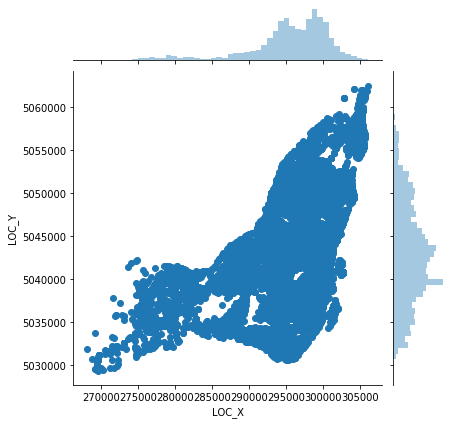

In [61]:
sns.jointplot(x="LOC_X", y="LOC_Y", data=accidents)

In [62]:
#accidents#
fig, ax = plt.subplots(1, figsize=(6, 6))
wgsAccidents = gpd.read_file("donnees/accidents-geobase/accidents0.shp").to_crs(epsg = 4326)
wgsAccidents.plot(ax=ax)
mpll.display(fig=fig)

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Mesures de centralité

In [63]:
from pointpats import PointPattern
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
pp = PointPattern(accidents[['LOC_X','LOC_Y']])
pp.summary()
pp10 = PointPattern(pp.points[::10])

Point Pattern
21381 points
Bounding rectangle [(268161.55812,5029325.1705), (306077.46146,5062512.1035)]
Area of window: 1258312543.7790642
Intensity estimate for window: 1.6991803908897612e-05
              x             y
0  277363.60800  5.034994e+06
1  274551.05174  5.033633e+06
2  277946.00000  5.035171e+06
3  276486.60700  5.038090e+06
4  279219.92101  5.040510e+06


[ 295248.31891199 5042923.71750606]


(266265.762953, 307973.256627, 5027665.82385, 5064171.45015)

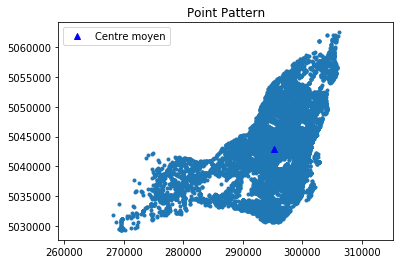

In [64]:
mc = mean_center(pp.points)
print(mc)
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Centre moyen')
plt.legend(numpoints=1)
plt.axis('equal')

[ 295110.32998692 5043326.28947861]


(5040923.717506057, 5044923.717506057)

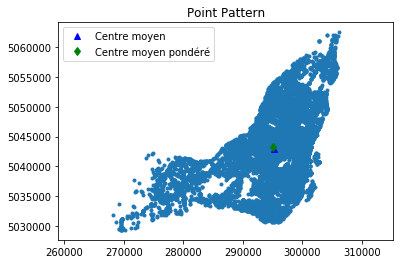

<Figure size 432x288 with 0 Axes>

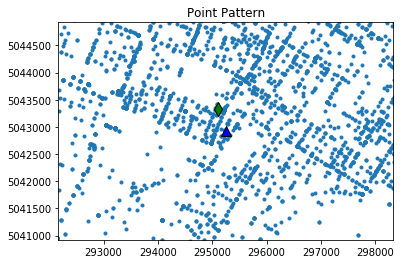

In [65]:
# centre moyen pondéré
wmc = weighted_mean_center(pp.points, accidents['NB_BLESSES']+accidents['NB_MORTS']) 
# accidents[['NB_BLESSES','NB_MORTS']].sum(axis=1)
print(wmc)
pp.plot() #use class method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'b^', label='Centre moyen') 
plt.plot(wmc[0], wmc[1], 'gd', label='Centre moyen pondéré')
plt.legend(numpoints=1)
plt.axis('equal')
plt.figure()
pp.plot() #use class method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'b^', label='Centre moyen', mec = 'k', ms = 10) 
plt.plot(wmc[0], wmc[1], 'gd', label='Centre moyen pondéré', mec = 'k', ms = 10)
#plt.legend(numpoints=1)
plt.axis('equal')
plt.xlim(mc[0]-2000,mc[0]+2000)
plt.ylim(mc[1]-2000,mc[1]+2000)

8475.721664485312


(267681.4735395, 307394.6514505, 5028144.21215, 5063509.12085)

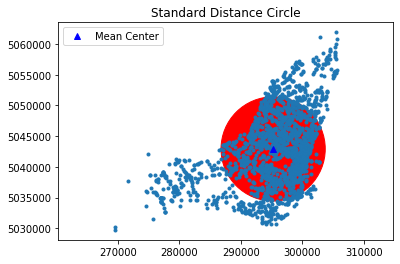

In [66]:
# Écart-type de la distance de chaque point par rapport au centre moyen
stdd = std_distance(pp.points)
print(stdd)
circle1=plt.Circle((mc[0], mc[1]),stdd,color='r')
ax = pp10.plot(get_ax=True, title='Standard Distance Circle')
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)
plt.axis('equal')

6331.511535676762 6332.882098141973 0.7771320793044179


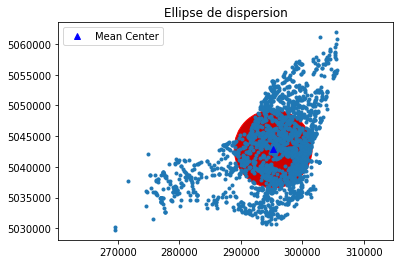

In [67]:
# Ellipse de dispersion
sx, sy, theta = ellipse(pp.points)
print(sx, sy, theta)
from matplotlib.patches import Ellipse
#fig, ax = plt.subplots(1, figsize = (10,10))
ax = pp10.plot(title='Ellipse de dispersion', get_ax = True)
e = Ellipse(xy=mean_center(pp.points), width=sx*2, height=sy*2, angle=-theta*180./np.pi) #angle is rotation in degrees (anti-clockwise)
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.8,0,0])
e.set_edgecolor([1,0,0])
#ax.set_xlim(0,100)
#ax.set_ylim(0,100)
ax.set_aspect('equal')
plt.axis('equal')
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)

6305.511886897116 6305.925865098324 0.7808760074965077
6299.217955088283 6316.435086531287 0.8141539534866549
6341.16982572868 6377.867721712437 0.7437836651348569
6337.333859456525 6341.081260827211 0.7985230647580354
6353.401124279784 6379.833927414526 0.74725532801942
6387.876179758507 6415.445726323321 0.7477882168974419
6187.925652282718 6201.1040432513655 0.7592878389799966
6467.9549124213745 6479.051841846826 0.8100659767591732
6394.816100059358 6397.663744256561 0.7737369258676113
6326.495297165079 6360.0756149970775 0.827294172033689
6201.756988783017 6218.2461708614965 0.7567367687889509
6315.043118745761 6319.757815036373 0.770538207937419


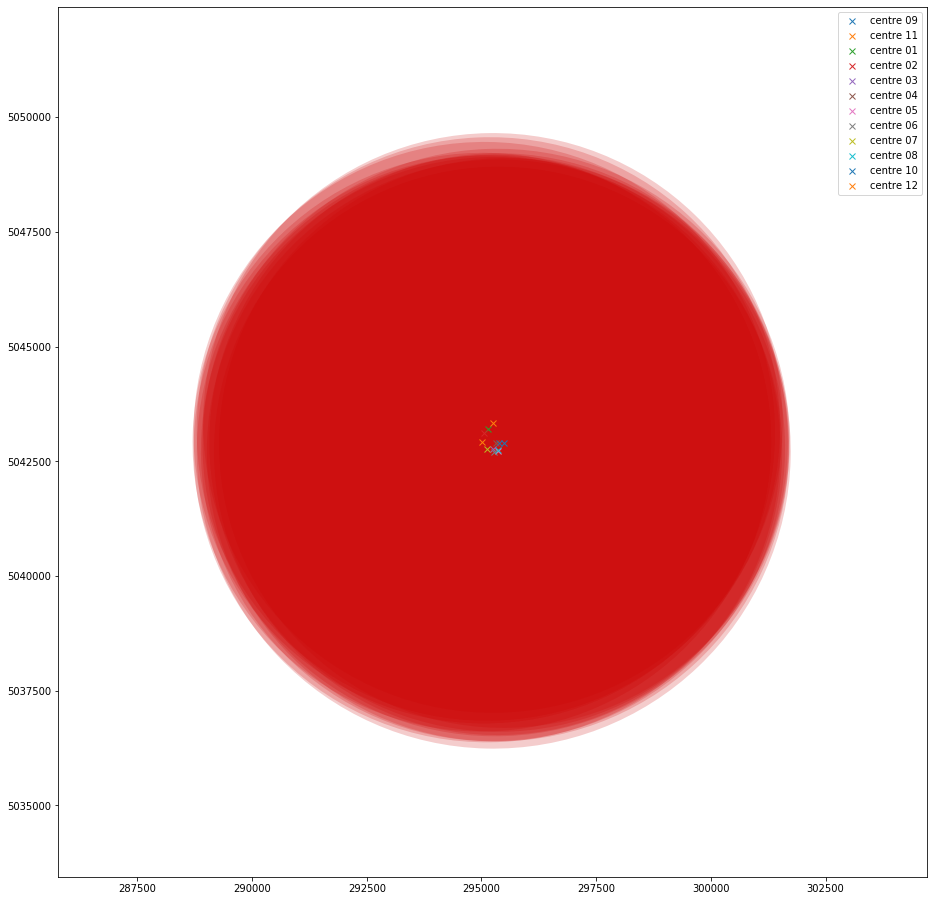

In [68]:
fig, ax = plt.subplots(1, figsize = (16,16))
for mois in accidents.MOIS.unique():
    points = accidents.loc[accidents.MOIS == mois, ['LOC_X','LOC_Y']]
    sx, sy, theta = ellipse(points)
    print(sx, sy, theta)
    c = mean_center(points)
    e = Ellipse(xy=c, width=sx*2, height=sy*2, angle=-theta*180./np.pi) #angle is rotation in degrees (anti-clockwise)
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_facecolor([0.8,0,0])
    e.set_alpha(0.2)
    plt.plot(c[0], c[1], 'x',label='centre '+mois)
ax.set_xlim(mc[0]-1.5*sx,mc[0]+1.5*sx)
ax.set_ylim(mc[1]-1.5*sy,mc[1]+1.5*sy)
ax.set_aspect('equal')
#plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend()

[[ 268161.55812 5031884.5624 ]
 [ 269196.26049 5029489.2959 ]
 [ 269542.71901 5029358.     ]
 [ 269642.5025  5029325.1705 ]
 [ 295279.504   5030599.774  ]
 [ 295965.844   5030716.     ]
 [ 296201.77994 5030777.3172 ]
 [ 300977.36554 5034486.8432 ]
 [ 301434.531   5035172.871  ]
 [ 302078.459   5036587.127  ]
 [ 305561.436   5055567.513  ]
 [ 305739.934   5056567.26   ]
 [ 306077.46146 5062512.1035 ]
 [ 304138.456   5062121.259  ]
 [ 274023.12652 5041829.4849 ]
 [ 273689.42659 5041354.562  ]
 [ 269225.8437  5033754.4181 ]] (268161.55812, 5029325.1705, 306077.46146, 5062512.1035)


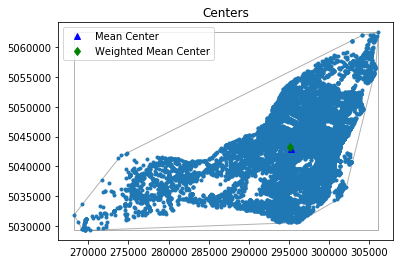

In [69]:
print(hull(pp.points), mbr(pp.points))
pp.plot(title='Centers', hull=True, window = True ) #plot point pattern "pp" as well as its convex hull
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.legend()

# Test de structure spatiale
Nous allons tester si la distribution des lieux des accidents suit une structure spatiale complètement aléatoire.

In [70]:
from pointpats import PoissonPointProcess, PoissonClusterPointProcess, Window, poly_from_bbox, PointPattern
import libpysal as ps
import pointpats.quadrat_statistics as qs

In [71]:
ile = ps.io.open('donnees/accidents-geobase/terre_shp.shp')
polys = [p for p in ile]
pmax=polys[0]
for p in polys:
    if p.area>pmax.area:
        pmax = p
window = Window(pmax.parts)

In [72]:
samples = PoissonPointProcess(window, 200, 1, conditioning=False, asPP=True)

Point Pattern
200 points
Bounding rectangle [(268608.4543081811,5030296.983332761), (305477.12624740833,5060105.4735754095)]
Area of window: 469190279.23398113
Intensity estimate for window: 4.262662907819148e-07
               x             y
0  293057.270247  5.043711e+06
1  297914.138188  5.049340e+06
2  302841.177913  5.050403e+06
3  287571.635981  5.035587e+06
4  291223.746490  5.041225e+06


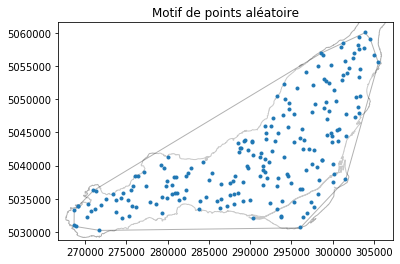

In [73]:
pp_csr = samples.realizations[0]
pp_csr.plot(window=True, hull=True, title='Motif de points aléatoire')
pp_csr.summary()
#plt.plot(*pmax.exterior.xy)

In [74]:
pp.summary()
print(pp.lambda_mbb, pp.lambda_hull)

Point Pattern
21381 points
Bounding rectangle [(268161.55812,5029325.1705), (306077.46146,5062512.1035)]
Area of window: 1258312543.7790642
Intensity estimate for window: 1.6991803908897612e-05
              x             y
0  277363.60800  5.034994e+06
1  274551.05174  5.033633e+06
2  277946.00000  5.035171e+06
3  276486.60700  5.038090e+06
4  279219.92101  5.040510e+06
1.6991803908897612e-05 3.1640330921407954e-05


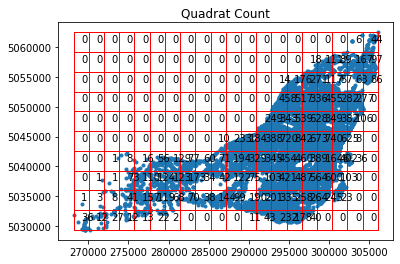

78355.82241242225 199 0.0


In [75]:
q_r = qs.QStatistic(pp,shape= "rectangle",nx = 20, ny = 10)
#plt.figure(figsize=(12,12))
q_r.plot()
print(q_r.chi2,q_r.df,q_r.chi2_pvalue)

<Figure size 864x864 with 0 Axes>

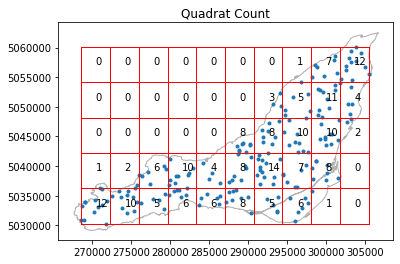

223.5 49 4.002492153975312e-24


In [76]:
q_r = qs.QStatistic(pp_csr,shape= "rectangle",nx = 10, ny = 5)
plt.figure(figsize=(12,12))
q_r.plot()
print(q_r.chi2,q_r.df,q_r.chi2_pvalue)

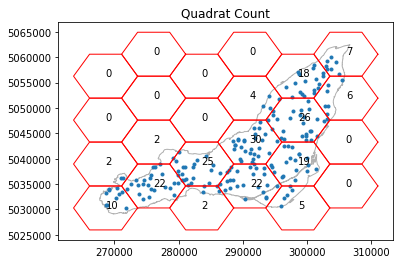

291.03999999999996 23 2.9437959452207904e-48


In [77]:
q_h = qs.QStatistic(pp_csr,shape= "hexagon",lh = 5000)
q_h.plot()
print(q_h.chi2,q_h.df,q_h.chi2_pvalue)

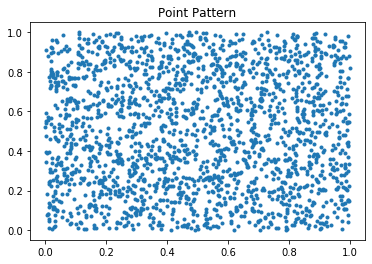

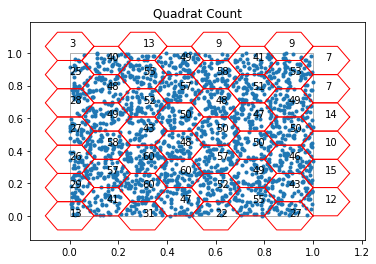

416.804 51 7.4089708606329315e-59


<Figure size 864x864 with 0 Axes>

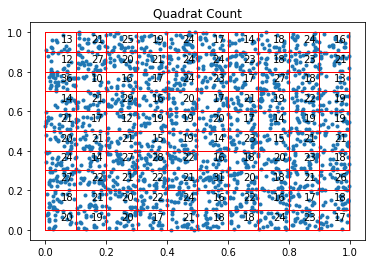

89.1 99 0.7519623605606764


In [78]:
points = [[0., 0.], [0., 1.], [1., 1.], [1., 0.]]
samples2 = PoissonPointProcess(PointPattern(points).get_window(), 2000, 1, conditioning=False, asPP=True)
pp_csr2 = samples2.realizations[0]
pp_csr2.plot()
q_h = qs.QStatistic(pp_csr2,shape= "hexagon",lh = 0.1)
q_h.plot()
print(q_h.chi2,q_h.df,q_h.chi2_pvalue)
q_r = qs.QStatistic(pp_csr2,shape= "rectangle",nx = 10, ny = 10)
plt.figure(figsize=(12,12))
q_r.plot()
print(q_r.chi2,q_r.df,q_r.chi2_pvalue)

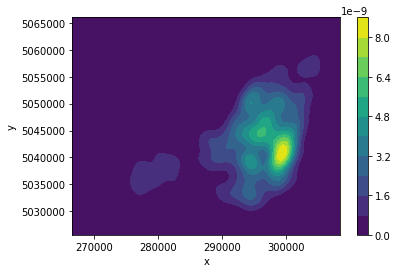

In [134]:
# kernel density estimation
sns.kdeplot(pp10.points.x, pp10.points.y, shade=True, cmap='viridis', cbar = True)
#pp.plot()

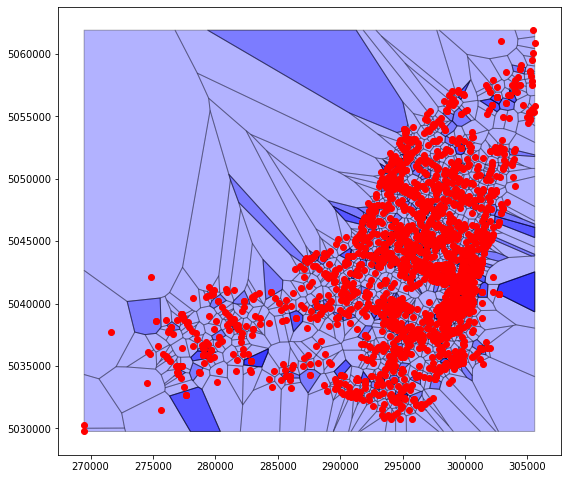

In [119]:
# diagramme de Voronoi
from libpysal.cg.voronoi  import voronoi, voronoi_frames, as_dataframes
regions, vertices = voronoi(pp10.points)
#vertices.shape
#plt.plot(vertices[:,0],vertices[:,1])
region_df, point_df = voronoi_frames(np.asarray(pp10.points))
#as_dataframes(regions, vertices, pp10.points)
#points = [(10.2, 5.1), (4.7, 2.2), (5.3, 5.7), (2.7, 5.3)]
#region_df, point_df = voronoi_frames(points)
fig, ax = plt.subplots(1,figsize=(9,9))
region_df.plot(ax=ax, color='blue',edgecolor='black', alpha=0.3)
point_df.plot(ax=ax, color='red')

(5035000, 5046000)

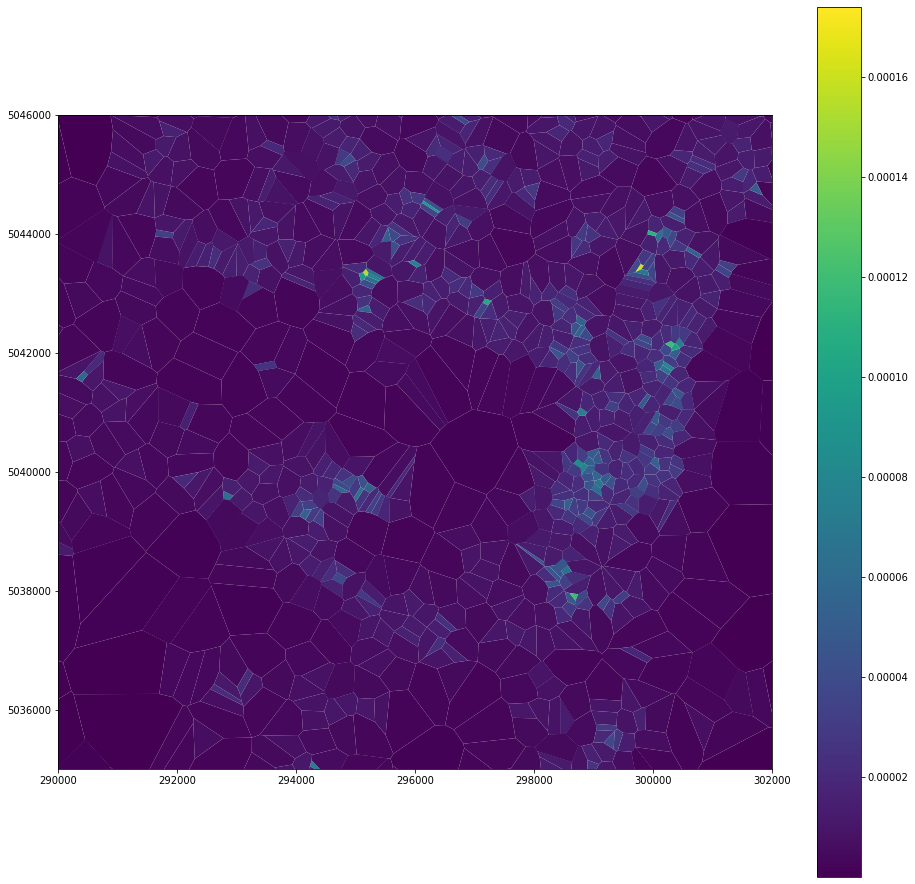

In [132]:
region_df['aires'] = 1/region_df.area
f, ax = plt.subplots(1, figsize=(16, 16))
region_df.plot(column='aires', legend = True, ax=ax)
#accidents[::10].plot(ax=ax)
#xmin, xmax = plt.xlim()
#ymin, ymax = plt.ylim()
plt.xlim(290000, 302000)
plt.ylim(5035000, 5046000)

# Auto-corrélation spatiale

In [79]:
from libpysal.weights import Queen, Rook, KNN

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
RA            41 non-null float64
SM13          41 non-null float64
SM13_nom      41 non-null object
NACCIDENTS    41 non-null float64
geometry      41 non-null geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 1.7+ KB


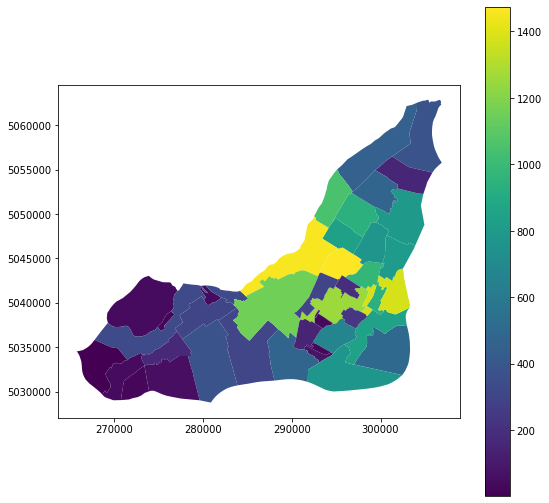

In [80]:
data = gpd.read_file('donnees/accidents-geobase/accidents_2018_smod13.shp')
f, ax = plt.subplots(1, figsize=(9, 9))
data.plot(column='NACCIDENTS', legend = True, ax=ax)
data.info()

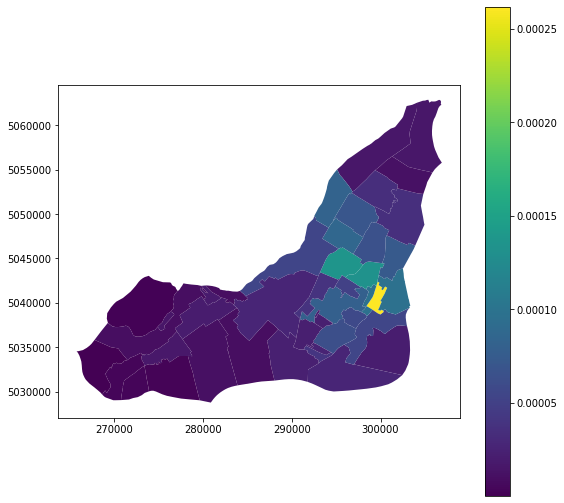

In [81]:
data['DENSITE_ACCIDENTS'] = data['NACCIDENTS']/data.geometry.area
f, ax = plt.subplots(1, figsize=(9, 9))
data.plot(column='DENSITE_ACCIDENTS', legend = True, ax=ax)

[(1, 1), (2, 8), (3, 3), (4, 9), (5, 9), (6, 9), (7, 0), (8, 1), (9, 1)]

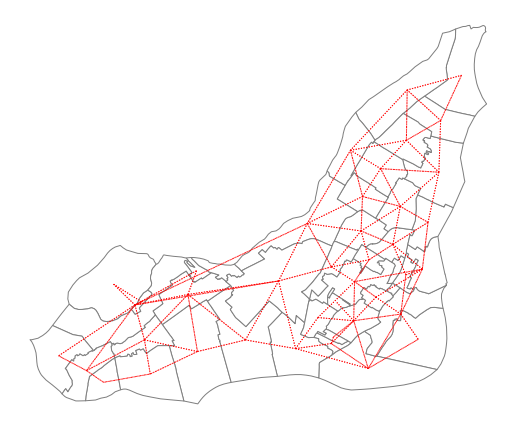

In [82]:
w_rook = Rook.from_dataframe(data)
ax = data.plot(edgecolor='grey', facecolor='w', figsize = (9,9))
f,ax = w_rook.plot(data, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()
w_rook.histogram

[(2, 6), (3, 4), (4, 8), (5, 10), (6, 7), (7, 3), (8, 2), (9, 1)]

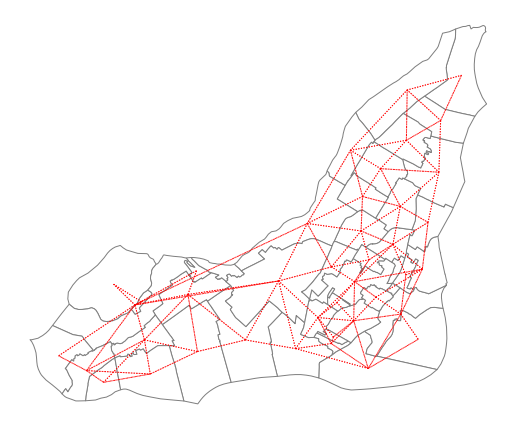

In [83]:
w_queen = Queen.from_dataframe(data)
ax = data.plot(edgecolor='grey', facecolor='w', figsize = (9,9))
f,ax = w_queen.plot(data, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()
w_queen.histogram

[(4, 41)]

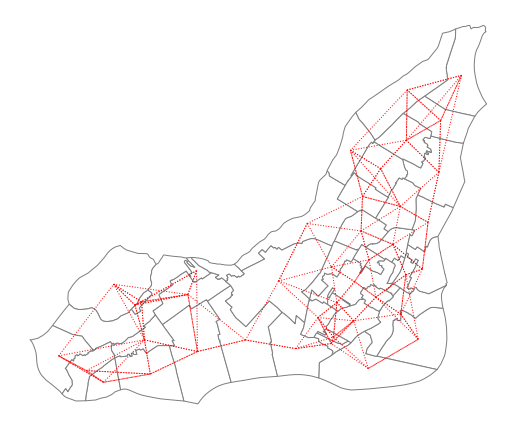

In [84]:
w_knn = KNN.from_dataframe(data, k=4)
ax = data.plot(edgecolor='grey', facecolor='w', figsize = (9,9))
f,ax = w_knn.plot(data, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()
w_knn.histogram
# from libpysal.weights.contiguity import Voronoi as Vornoi_weights
# w = Vornoi_weights(points)

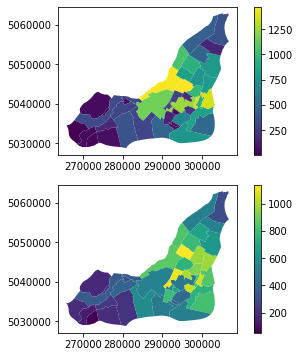

In [85]:
w_rook.transform = 'r'
data['NACCIDENTS_LAG'] = ps.weights.lag_spatial(w_rook, data.NACCIDENTS)
f, (ax1,ax2) = plt.subplots(2, figsize=(6,6))
data.plot(column='NACCIDENTS', legend = True, ax=ax1)
data.plot(column='NACCIDENTS_LAG', legend = True, ax=ax2)

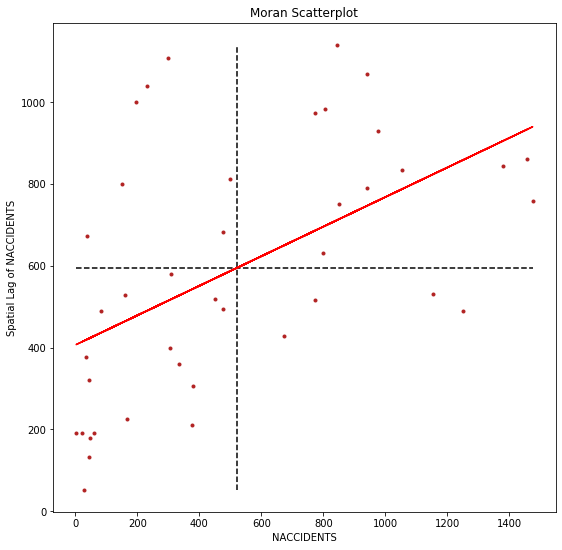

In [86]:
# moran plot
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(data.NACCIDENTS, data.NACCIDENTS_LAG, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(data.NACCIDENTS.mean(), data.NACCIDENTS_LAG.min(), data.NACCIDENTS_LAG.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(data.NACCIDENTS_LAG.mean(), data.NACCIDENTS.min(), data.NACCIDENTS.max(), linestyle='--')

# red line of best fit using global I as slope
b,a = np.polyfit(data.NACCIDENTS, data.NACCIDENTS_LAG, 1)
plt.plot(data.NACCIDENTS, a + b*data.NACCIDENTS, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of NACCIDENTS')
plt.xlabel('NACCIDENTS')
plt.show()

In [87]:
import esda
mi = esda.moran.Moran(data.NACCIDENTS, w_rook)
print(mi.I,mi.p_sim)

0.36158653484057673 0.002


In [88]:
geary = esda.geary.Geary(data.NACCIDENTS, w_rook)
print(geary.C, geary.p_sim)

0.608785544050299 0.003


array([2, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 2, 1, 1, 2, 2, 2, 2, 3, 2])

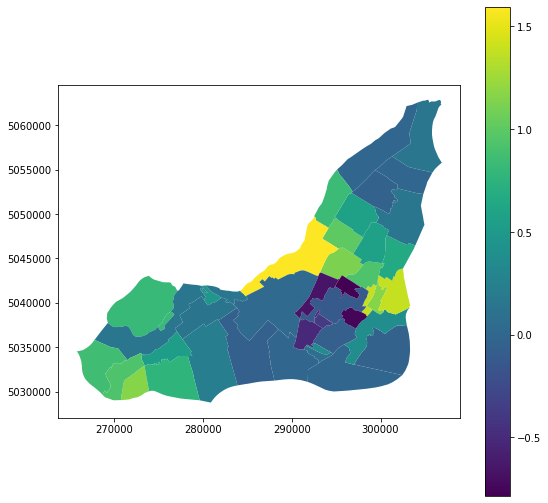

In [89]:
li = esda.moran.Moran_Local(data.NACCIDENTS, w_rook)
data['MORAN'] = li.Is
f, ax = plt.subplots(1, figsize=(9, 9))
data.plot(column='MORAN', legend = True, ax=ax)
li.q
# (if permutations>0) values indicate quandrant location 1 HH, 2 LH, 3 LL, 4 HL

In [90]:
from matplotlib import colors
sig = li.p_sim < 0.05
hotspots = sig * li.q==1
coldspots = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

,RA,SM13,SM13_nom,NACCIDENTS,geometry,DENSITE_ACCIDENTS,NACCIDENTS_LAG,MORAN
16,1.0,101.0,Montreal : Centre-ville,942.0,"POLYGON ((299612.158 5038871.392, 299554.850 5...",0.000262,1069.000000,1.160084
18,1.0,102.0,Montreal : Centre-ville peripherique,1380.0,"MULTIPOLYGON (((299781.635 5043017.554, 299805...",0.000096,843.000000,1.390788
22,2.0,106.0,Montreal : Plateau Mont-Royal,975.0,"POLYGON ((297843.476 5044019.433, 297940.649 5...",0.000133,928.333333,0.929684
23,2.0,109.0,Montreal : Saint-Michel,843.0,"POLYGON ((294059.876 5048264.253, 294099.050 5...",0.000087,1139.800000,1.001664
24,2.0,108.0,Montreal : Ahuntsic,1458.0,"POLYGON ((291568.009 5047668.719, 291600.494 5...",0.000053,859.833333,1.596580
25,2.0,111.0,Montreal : Sud-Est,805.0,"POLYGON ((300491.251 5045340.038, 300499.176 5...",0.000073,981.750000,0.657497
26,2.0,110.0,Montreal : Rosemont,772.0,"POLYGON ((298636.049 5048423.473, 298644.573 5...",0.000065,973.333333,0.570343


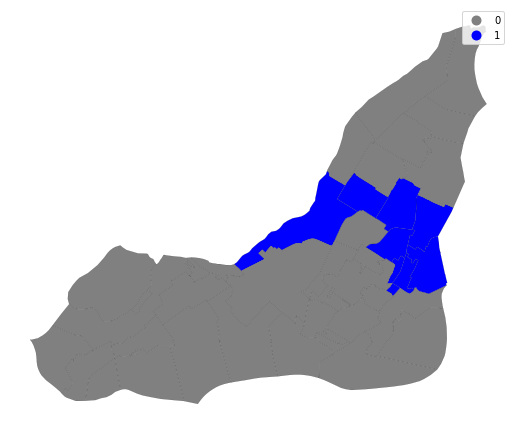

In [91]:
cmap = colors.ListedColormap(['grey', 'blue'])
f, ax = plt.subplots(1, figsize=(9, 9))
data.assign(cl=hotspots*1).plot(column='cl', categorical=True, \
        k=2, cmap=cmap, linewidth=0.1, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
data[hotspots]

,RA,SM13,SM13_nom,NACCIDENTS,geometry,DENSITE_ACCIDENTS,NACCIDENTS_LAG,MORAN
10,4.0,137.0,Kirkland,167.0,"POLYGON ((277273.784 5033997.744, 277012.702 5...",0.000017,225.20,0.529215
12,4.0,139.0,Baie-D'Urfe,29.0,"POLYGON ((273723.820 5031277.314, 273837.497 5...",0.000004,53.00,1.162547
15,4.0,140.0,Sainte-Anne-de-Bellevue,46.0,"POLYGON ((269440.794 5030250.700, 269448.728 5...",0.000004,133.75,0.928955


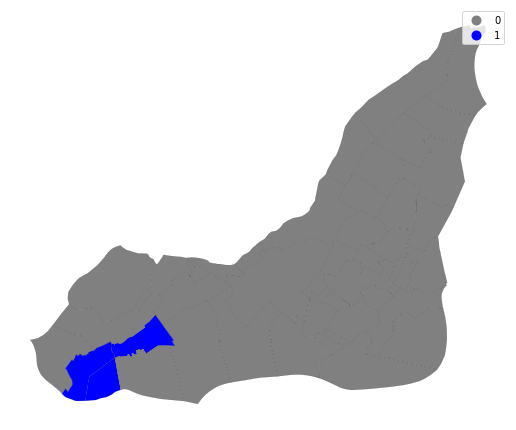

In [135]:
cmap = colors.ListedColormap(['grey', 'blue'])
f, ax = plt.subplots(1, figsize=(9, 9))
data.assign(cl=coldspots*1).plot(column='cl', categorical=True, \
        k=2, cmap=cmap, linewidth=0.1, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
data[coldspots]

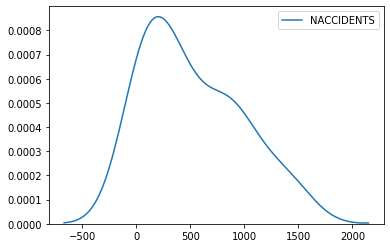

In [136]:
sns.kdeplot(data.NACCIDENTS)

# Segmentation spatiale

In [137]:
import sklearn.cluster as skc

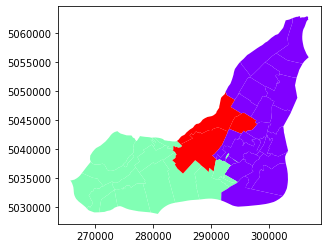

In [138]:
clusters = skc.AgglomerativeClustering(n_clusters=3,connectivity=w_rook.sparse).fit(data[['NACCIDENTS']])
data.assign(labels=clusters.labels_).plot('labels', cmap='rainbow')

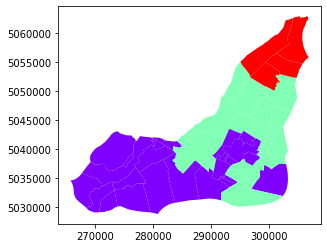

In [139]:
clusters = skc.AgglomerativeClustering(n_clusters=3,connectivity=w_knn.sparse).fit(data[['NACCIDENTS']])
data.assign(labels=clusters.labels_).plot('labels', cmap='rainbow')

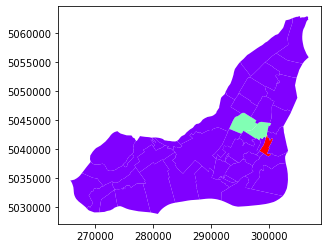

In [140]:
clusters = skc.AgglomerativeClustering(n_clusters=3,connectivity=w_rook.sparse).fit(data[['DENSITE_ACCIDENTS']])
data.assign(labels=clusters.labels_).plot('labels', cmap='rainbow')

< 9. [Fouille de données](09-fouille-donnees.ipynb) | [Contents](index.ipynb) |